In [1]:
from utils.binaries import *
from utils.plotting import *

10:31:05 [INFO] utils          -- (  +411ms) -- import logging
10:31:05 [INFO] utils.binaries -- (  +130ms) -- import numpy as np
10:31:05 [INFO] utils.binaries -- (    +6ms) -- import uncertainties
10:31:05 [INFO] utils.binaries -- (  +150ms) -- import pandas as pd
10:31:05 [INFO] utils.binaries -- (    +2ms) -- import binaries.tools as tools
10:31:05 [INFO] utils.plotting -- (  +271ms) -- import matplotlib.pyplot as plt
10:31:06 [INFO] utils.plotting -- (  +328ms) -- import seaborn as so
10:31:06 [DBUG] utils.plotting -- (    +6ms) -- font size set to 9.5
10:31:06 [DBUG] utils.plotting -- (    +1ms) -- label size set to 13.0
10:31:06 [DBUG] utils.plotting -- (    +1ms) -- figure size set to [6.6, 3.3]
10:31:06 [DBUG] utils.plotting -- (    +1ms) -- markersize set to 2.0
10:31:06 [DBUG] utils.plotting -- (    +1ms) -- usetex set to False
10:31:06 [INFO] utils.plotting -- (    +2ms) -- import plotting.tools as plot


In [16]:
import os

base = '/cr/users/filip/Data/StationEfficiencies/'

for station in ['Constanza', 'Nadia', 'NuriaJr', 'Svenja']:

    date = '2023_03' if station in ['Nadia', 'Constanza'] else '2022_11'
    # all_peaks = np.loadtxt(f'{base}/{station}_all.gz')
    t1s_peaks = np.loadtxt(f'{base}/{station}_t1s.gz')
    DAQ_time = len(os.listdir(f'/cr/data02/AugerPrime/UUB/UubRandoms/{date}/{station}')) * 5000 * 2048 * 8.33e-9
    break

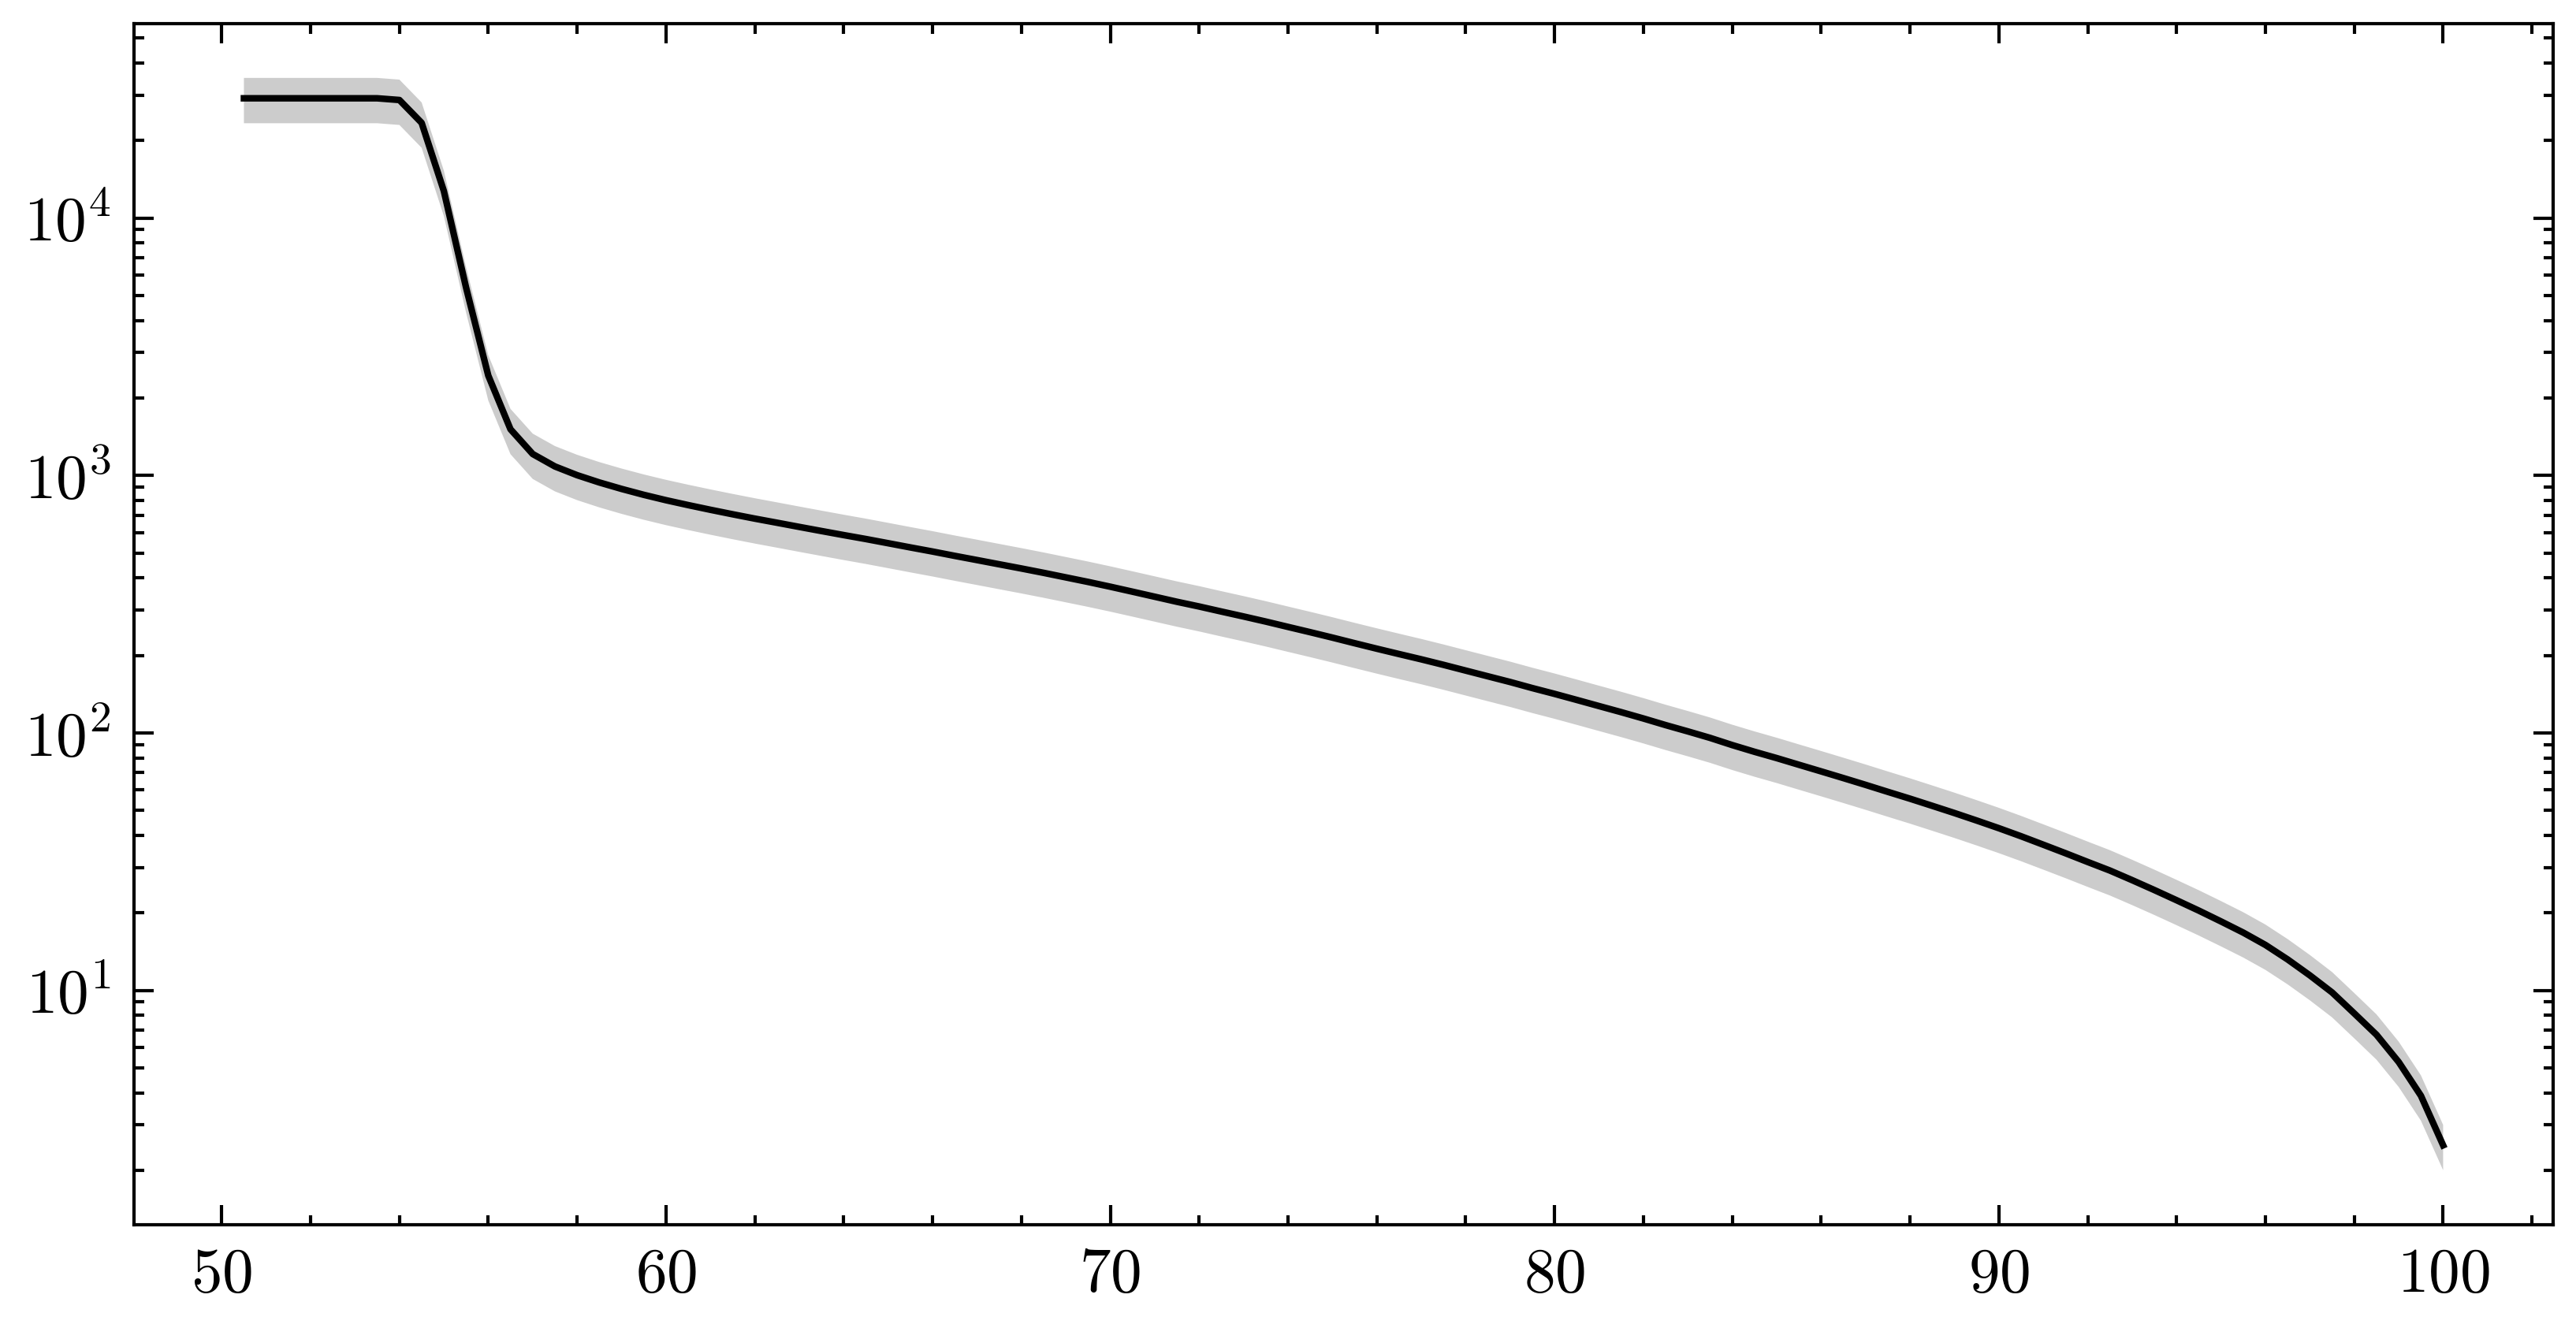

In [19]:
to_integral_rate = lambda n, t :  np.cumsum(n[::-1])[::-1] / t

n_all, bins = np.histogram(t1s_peaks, bins=100, range=(0, 100))
rates_all = to_integral_rate(n_all, DAQ_time)
plt.plot(0.5 * (bins[1:] + bins[-1:]), rates_all)
plt.fill_between(0.5 * (bins[1:] + bins[-1:]), rates_all * 0.8, rates_all * 1.2, alpha=0.2)
plt.yscale('log')